In [ ]:
# Combine into a single tab-delimited file 
# Sort & remove duplicate lines
# Remove near duplicate lines
# Remove lines where SRC == TRG or where SRC ~= TRG (similarity scores)
# Pre-process & word-tokenize
# Count number of tokens in SRC and TRG in each line -> 1. Remove too long sentences & 2. Remove outliers

### Data

In [1]:
!pwd

/Users/alexskrn/Documents/TEXT_CORPORA


In [2]:
SRC_DATA_PREFIX = '/Users/alexskrn/Documents/TEXT_CORPORA/united_nations_corpus/en-ru'
PROC_DATA_PREFIX = '/Users/alexskrn/Documents/TEXT_CORPORA/united_nations_corpus/en-ru/PREPROC_FILES'

In [12]:
raw_src_en = 's_res_en'
raw_src_ru = 's_res_ru'

In [9]:
!wc -l {SRC_DATA_PREFIX}/"$raw_src_en"
!wc -l {SRC_DATA_PREFIX}/"$raw_src_ru"

   42421 /Users/alexskrn/Documents/TEXT_CORPORA/united_nations_corpus/en-ru/s_res_en
   42421 /Users/alexskrn/Documents/TEXT_CORPORA/united_nations_corpus/en-ru/s_res_ru


In [11]:
!head -4 {SRC_DATA_PREFIX}/"$raw_src_en"
!head -4 {SRC_DATA_PREFIX}/"$raw_src_ru"

Distr.
GENERAL
28 July 1993
RESOLUTION 852 (1993)
Distr.
GENERAL
28 July 1993
РЕЗОЛЮЦИЯ 852 (1993),


In [14]:
!tail -1 {SRC_DATA_PREFIX}/"$raw_src_en"
!tail -1 {SRC_DATA_PREFIX}/"$raw_src_ru"

22. Recalls the request, in resolution 2178 (2014), to the Analytical Support and Sanctions Monitoring Team, in close cooperation with all relevant United Nations counter-terrorism bodies, to report to the Committee pursuant to resolution 1267 (1999) and 1989 (2011) within 180 days, on the threat posed by foreign terrorist fighters recruited by or joining ISIL, ANF, and all groups, undertakings, and entities associated with Al-Qaida, and reiterates that this report should also focus on trends related to foreign terrorist fighters joining and working with all terrorist groups listed on the 1267 Al-Qaida Sanctions List, and should include an oral briefing to the Committee and a Committee brief to the Security Council at the next regular briefing on counter-terrorism on those operating in Africa.
22. напоминает о просьбе, адресованной в резолюции 2178 (2014) Группе по аналитической поддержке и наблюдению за санкциями и заключающейся в том, чтобы она, действуя в тесном сотрудничестве со вс

### Combine into a single tab-delimited file 

In [16]:
!paste {SRC_DATA_PREFIX}/"$raw_src_en" {SRC_DATA_PREFIX}/"$raw_src_ru" > \
       {PROC_DATA_PREFIX}/en_ru
!wc -l {PROC_DATA_PREFIX}/en_ru
!head -4 {PROC_DATA_PREFIX}/en_ru

   42421 /Users/alexskrn/Documents/TEXT_CORPORA/united_nations_corpus/en-ru/PREPROC_FILES/combined_en_ru
Distr.	Distr.
GENERAL	GENERAL
28 July 1993	28 July 1993
RESOLUTION 852 (1993)	РЕЗОЛЮЦИЯ 852 (1993),


### Sort & remove duplicate lines

In [50]:
!sort -u {PROC_DATA_PREFIX}/en_ru > {PROC_DATA_PREFIX}/en_ru_sort_uniq
!wc -l {PROC_DATA_PREFIX}/en_ru_sort_uniq
!head -4 {PROC_DATA_PREFIX}/en_ru_sort_uniq

   35367 /Users/alexskrn/Documents/TEXT_CORPORA/united_nations_corpus/en-ru/PREPROC_FILES/combined_en_ru_sorted_uniq
− Alphons Orie (The Netherlands)	- Алфонс Ори (Нидерланды)
− Antoine Kesia-Mbe Mindua (Democratic Republic of Congo)	- Антуан Кесия-Мбе Миндуа (Демократическая Республика Конго)
− Bakone Justice Moloto (South Africa)	- Баконе Джастис Молото (Южная Африка)
− Burton Hall (The Bahamas)	- Бертон Холл (Багамские Острова)


In [51]:
!tail -4 {PROC_DATA_PREFIX}/en_ru_sort_uniq

Árpád Prandler (Hungary)	Арпат Прандлер (Венгрия)
◦ Development with IAEA of a standing multilateral mechanism for reliable access to nuclear fuel, based on ideas to be considered at the next meeting of the Board of Governors.	:: создания совместно с МАГАТЭ постоянного многостороннего механизма надежного обеспечения доступа к ядерному топливу на основе идей, которые будут рассмотрены на следующем заседании Совета управляющих.
◦ Establishment on commercial terms of a buffer stock to hold a reserve of up to five years' supply of nuclear fuel dedicated to Iran, with the participation and under supervision of IAEA.	:: создания на коммерческих началах резервных запасов предназначенного для Ирана ядерного топлива, рассчитанных на пять лет, при участии и под контролем МАГАТЭ;
◦ Participation as a partner in an international facility in Russia to provide enrichment services for a reliable supply of fuel to Iran's nuclear reactors.	:: привлечения его в качестве партнера к работе находящегося в 

In [65]:
def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1

print(file_len(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq'))

35367


### Remove near duplicate lines

In [3]:
import nltk
from nltk.metrics.distance import jaro_similarity

In [44]:
# Get rid of near duplicate lines
# ! takes long - wait
threshold = 0.85
with open(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq', 'r', encoding='utf8') as inF, \
     open(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq_nearduplrem', 'w', encoding='utf8') as toF:
    prev_line = inF.readline()
    for curr_line in inF:
        if jaro_similarity(prev_line, curr_line) > threshold:  # Two lines are very similar, forget previous line
            prev_line = curr_line
        else:
            toF.write(prev_line)   # If not similar, put previous line into file,
            prev_line = curr_line  # then forget previous line

!wc -l {PROC_DATA_PREFIX}/'en_ru_sort_uniq'
!wc -l {PROC_DATA_PREFIX}/'en_ru_sort_uniq_nearduplrem'

   35367 /Users/alexskrn/Documents/TEXT_CORPORA/united_nations_corpus/en-ru/PREPROC_FILES/en_ru_sort_uniq
   28972 /Users/alexskrn/Documents/TEXT_CORPORA/united_nations_corpus/en-ru/PREPROC_FILES/en_ru_sort_uniq_nearduplrem


### Count similarity scores between SRC and TRG -> Remove lines where SRC == TRG or where SRC ~= TRG

In [197]:
!sed -n -e '34934{p;q;}' /Users/alexskrn/Documents/TEXT_CORPORA/united_nations_corpus/en-ru/PREPROC_FILES/en_ru_sort_uniq

c. Location: Room 1610 Nan Fung Tower, 173 Des Voeux Road, Hong Kong	c. Место расположения: Room 1610 Nan Fung Tower, 173 Des Voeux Road, Hong Kong


In [175]:
!sed -n -e '28134{p;q;}' /Users/alexskrn/Documents/TEXT_CORPORA/united_nations_corpus/en-ru/PREPROC_FILES/en_ru_sort_uniq

Recalling its resolutions 1267 (1999), 1333 (2000), 1363 (2001), 1373 (2001), 1390 (2002), 1452 (2002), 1455 (2003), 1526 (2004), 1566 (2004), 1617 (2005), 1624 (2005), 1699 (2006), 1730 (2006), 1735 (2006), and 1822 (2008), and the relevant statements of its President,	ссылаясь на свои резолюции 1267 (1999), 1333 (2000), 1363 (2001), 1373 (2001), 1390 (2002), 1452 (2002), 1455 (2003), 1526 (2004), 1566 (2004), 1617 (2005), 1624 (2005), 1699 (2006), 1730 (2006), 1735 (2006) и 1822 (2008) и на соответствующие заявления своего Председателя,


In [168]:
str1 = "95-37553 (E) 281195"
str2 = "95-37555.R 281195 281195"
jaro_similarity(str1, str2)

0.7826023391812865

In [216]:
str1 = """Гуманитарный призыв"""
str2 = """Humanitarian appeal"""
jaro_similarity(str1, str2)

0.36842105263157887

In [45]:
# Count all similarity scores - ! takes long - next time write to file
jaco_simil_scores_list = []
with open(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq_nearduplrem', 'r', encoding='utf8') as inF:
    for line in inF:
        line_list = line.split('\t')
        src_str, trg_str = line_list[0].strip(), line_list[1].strip()
        jaco_simil_scores_list.append(jaro_similarity(src_str, trg_str))

NameError: name 'jaco_simil_scores' is not defined

In [51]:
print(len(jaco_simil_scores_list))
print(sorted(jaco_simil_scores_list, reverse=True)[:300])

28972
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0

In [53]:
# Keep lines where SRC and TRG are very distinct
threshold = 0.45
with open(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq_nearduplrem', 'r', encoding='utf8') as inF_text, \
    open(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq_nearduplrem_dissim', 'w', encoding='utf8') as toF_text:
    for i, line in enumerate(inF_text):
        if jaco_simil_scores_list[i] < threshold:  # If SRC and TRG are not too simialr, keep the line
            toF_text.write(line)

!wc -l {PROC_DATA_PREFIX}/'en_ru_sort_uniq_nearduplrem_dissim'

   25971 /Users/alexskrn/Documents/TEXT_CORPORA/united_nations_corpus/en-ru/PREPROC_FILES/en_ru_sort_uniq_nearduplrem_dissim


### Pre-process & word-tokenize

In [62]:
import string
import nltk

stopwords = ['the', 'a', 'an', 'of',
#              's', 'and', 'и', 'or', 'или',
#              'been', 'being', 'by'
            ]

def preprocess(text):
    """Return a string cleaned up."""
    # lowercase
    text = text.lower()
    # word-tokenize & remove numbers if the entire token consists of numbers
    text = ' '.join(t for t in nltk.wordpunct_tokenize(text) if not t.isdigit() and not t in stopwords)
    # remove punctuation
    punct_remove = set(string.punctuation) | {'−', '\t', '\n', '\r', '\x0b', '\x0c', '◦', '°'}
    text = ''.join(char for char in text if char not in punct_remove)
    # strip extra whitespaces
    text = ' '.join(text.split())
    return text

In [55]:
# check if it works as expected
# text = """!"#$%&'()*+,-−./:;<=>?@[\]^_`{|}~"""
text = "◦ The Participation as a partner in an the international facility in Russia to provide enrichment services for a reliable supply of fuel to Iran's nuclear reactors."
preprocess(text)

'participation as partner in international facility in russia to provide enrichment services for reliable supply of fuel to iran s nuclear reactors'

In [63]:
with open(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq_nearduplrem_dissim', 'r', encoding='utf8') as inF, \
     open(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq_nearduplrem_dissim_tok', 'w', encoding='utf8') as toF:
    for line in inF:
        line_list = line.split('\t')
        src_str, trg_str = line_list[0].strip(), line_list[1].strip()
        toF.write(preprocess(src_str) + '\t' + preprocess(trg_str) + '\n')

In [64]:
!wc -l {PROC_DATA_PREFIX}/'en_ru_sort_uniq_nearduplrem_dissim'
!wc -l {PROC_DATA_PREFIX}/'en_ru_sort_uniq_nearduplrem_dissim_tok'

   25971 /Users/alexskrn/Documents/TEXT_CORPORA/united_nations_corpus/en-ru/PREPROC_FILES/en_ru_sort_uniq_nearduplrem_dissim
   25971 /Users/alexskrn/Documents/TEXT_CORPORA/united_nations_corpus/en-ru/PREPROC_FILES/en_ru_sort_uniq_nearduplrem_dissim_tok


In [65]:
print('BEFORE\n')
!head -2 {PROC_DATA_PREFIX}/'en_ru_sort_uniq_nearduplrem_dissim'
!tail -2 {PROC_DATA_PREFIX}/'en_ru_sort_uniq_nearduplrem_dissim'
print('\nAFTER\n')
!head -2 {PROC_DATA_PREFIX}/'en_ru_sort_uniq_nearduplrem_dissim_tok'
!tail -2 {PROC_DATA_PREFIX}/'en_ru_sort_uniq_nearduplrem_dissim_tok'

BEFORE

− Antoine Kesia-Mbe Mindua (Democratic Republic of Congo)	- Антуан Кесия-Мбе Миндуа (Демократическая Республика Конго)
− Howard Morrison (United Kingdom)	- Говард Моррисон (Соединенное Королевство)
◦ Development with IAEA of a standing multilateral mechanism for reliable access to nuclear fuel, based on ideas to be considered at the next meeting of the Board of Governors.	:: создания совместно с МАГАТЭ постоянного многостороннего механизма надежного обеспечения доступа к ядерному топливу на основе идей, которые будут рассмотрены на следующем заседании Совета управляющих.
◦ Establishment on commercial terms of a buffer stock to hold a reserve of up to five years' supply of nuclear fuel dedicated to Iran, with the participation and under supervision of IAEA.	:: создания на коммерческих началах резервных запасов предназначенного для Ирана ядерного топлива, рассчитанных на пять лет, при участии и под контролем МАГАТЭ;

AFTER

antoine kesia mbe mindua democratic republic congo	антуа

### Count sentence lengths

In [59]:
# Count sentence lengths
def count_sent_len(data_prefix, file_in, file_out):
    with open(data_prefix + '/' + file_in, 'r', encoding='utf8') as inF, \
        open(data_prefix + '/' + file_out, 'w', encoding='utf8') as toF_nums:
        for line in inF:
            line_list = line.split('\t')
            src_str, trg_str = line_list[0].strip(), line_list[1].strip()
            src_len, trg_len = len(src_str.split()), len(trg_str.split())
            toF_nums.write('{}\t{}\n'.format(src_len, trg_len))

In [66]:
count_sent_len(PROC_DATA_PREFIX, 'en_ru_sort_uniq_nearduplrem_dissim_tok', 'sent_lengths.txt')

In [68]:
!wc -l {PROC_DATA_PREFIX}/'en_ru_sort_uniq_nearduplrem_dissim_tok'
!wc -l {PROC_DATA_PREFIX}/'sent_lengths.txt'
!head -3 {PROC_DATA_PREFIX}/'sent_lengths.txt'

   25971 /Users/alexskrn/Documents/TEXT_CORPORA/united_nations_corpus/en-ru/PREPROC_FILES/en_ru_sort_uniq_nearduplrem_dissim_tok
   25971 /Users/alexskrn/Documents/TEXT_CORPORA/united_nations_corpus/en-ru/PREPROC_FILES/sent_lengths.txt
7	7
4	4
4	4


### Remove outliers - where difference in length between SRC and TRG is unusual

Maximum number of standard deviations allowed in the difference in length between the source and target sentences

In [113]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

my_data = pd.read_csv(PROC_DATA_PREFIX + '/' + 'sent_lengths.txt', sep='\t', header=None)
my_data.columns = ['src_len', 'trg_len']

In [114]:
my_data['diff'] = my_data.loc[:, 'src_len'] - my_data.loc[:, 'trg_len']
my_data.head()

,src_len,trg_len,diff
0,7,7,0
1,4,4,0
2,4,4,0
3,5,5,0
4,5,5,0


In [115]:
diff_mean = np.mean(my_data.loc[:, "diff"])
diff_std = np.std(my_data.loc[:, "diff"])
print('Mean difference and standard deviation of the difference in length between SRC and TRG senteces:')
print(diff_mean, diff_std)

Mean difference and standard deviation of the difference in length between SRC and TRG senteces:
-2.3534326749066268 4.74472866424436


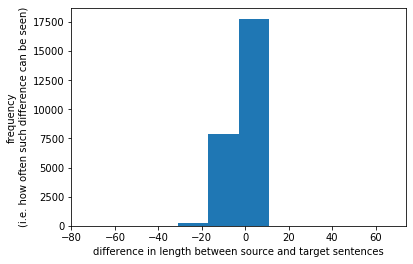

In [116]:
plt.hist(my_data.loc[:, "diff"])
plt.xlabel("difference in length between source and target sentences")
plt.ylabel("frequency\n(i.e. how often such difference can be seen)")
plt.show()

In [ ]:
# This means Russian sentences tend to be longer than the English ones

In [117]:
num_std = 2
limit_hi = diff_mean + num_std * diff_std
limit_lo = diff_mean - num_std * diff_std
print(limit_lo, limit_hi)

-11.842890003395347 7.136024653582094


In [74]:
# Inspect sentences
with open(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq_nearduplrem_dissim_tok', 'r', encoding='utf8') as inF, \
     open(PROC_DATA_PREFIX + '/' + 'outliers_at_2_std.txt', 'w', encoding='utf8') as toF:
    for idx, line in enumerate(inF):
        if (my_data.loc[:, "diff"][idx] > limit_hi) or (my_data.loc[:, "diff"][idx] < limit_lo):
            toF.write(line)  # write sentences where difference in length is outside of above limits

In [75]:
!wc -l {PROC_DATA_PREFIX}/'outliers_at_2_std.txt'

    1238 /Users/alexskrn/Documents/TEXT_CORPORA/united_nations_corpus/en-ru/PREPROC_FILES/outliers_at_2_std.txt


In [76]:
# remove outliers from raw text & tokenized text files
with open(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq_nearduplrem_dissim_tok', 'r', encoding='utf8') as inF, \
     open(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq_nearduplrem_dissim_tok_2std', 'w', encoding='utf8') as toF:
    for idx, line in enumerate(inF):
        if (my_data.loc[:, "diff"][idx] < limit_hi) and (my_data.loc[:, "diff"][idx] > limit_lo):
            toF.write(line)  # keep line if difference is within above limits
            
!wc -l {PROC_DATA_PREFIX}/'en_ru_sort_uniq_nearduplrem_dissim_tok'
!wc -l {PROC_DATA_PREFIX}/'en_ru_sort_uniq_nearduplrem_dissim_tok_2std'

   25971 /Users/alexskrn/Documents/TEXT_CORPORA/united_nations_corpus/en-ru/PREPROC_FILES/en_ru_sort_uniq_nearduplrem_dissim_tok
   24733 /Users/alexskrn/Documents/TEXT_CORPORA/united_nations_corpus/en-ru/PREPROC_FILES/en_ru_sort_uniq_nearduplrem_dissim_tok_2std


In [77]:
with open(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq_nearduplrem_dissim', 'r', encoding='utf8') as inF, \
     open(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq_nearduplrem_dissim_2std', 'w', encoding='utf8') as toF:
    for idx, line in enumerate(inF):
        if (my_data.loc[:, "diff"][idx] < limit_hi) and (my_data.loc[:, "diff"][idx] > limit_lo):
            toF.write(line)  # keep line if difference is within above limits
            
!wc -l {PROC_DATA_PREFIX}/'en_ru_sort_uniq_nearduplrem_dissim'
!wc -l {PROC_DATA_PREFIX}/'en_ru_sort_uniq_nearduplrem_dissim_2std'

   25971 /Users/alexskrn/Documents/TEXT_CORPORA/united_nations_corpus/en-ru/PREPROC_FILES/en_ru_sort_uniq_nearduplrem_dissim
   24733 /Users/alexskrn/Documents/TEXT_CORPORA/united_nations_corpus/en-ru/PREPROC_FILES/en_ru_sort_uniq_nearduplrem_dissim_2std


### Remove too long sentences

In [78]:
import pandas as pd

my_data = pd.read_csv(PROC_DATA_PREFIX + '/' + 'sent_lengths.txt', sep='\t', header=None)
my_data.columns = ['src_len', 'trg_len']
my_data.head()

,src_len,trg_len
0,7,7
1,4,4
2,4,4
3,5,5
4,5,5


In [79]:
my_data.shape

(25971, 2)

In [80]:
# Remove too long sentences
threshold = 40
with open(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq_nearduplrem_dissim_2std', 'r', encoding='utf8') as inF, \
     open(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq_nearduplrem_dissim_2std_40', 'w', encoding='utf8') as toF:
    for idx, line in enumerate(inF):
        if (my_data.loc[:, 'src_len'][idx] < threshold) and (my_data.loc[:, 'trg_len'][idx] < threshold):
            toF.write(line)

In [81]:
!wc -l {PROC_DATA_PREFIX}/'en_ru_sort_uniq_nearduplrem_dissim_2std'
!wc -l {PROC_DATA_PREFIX}/'en_ru_sort_uniq_nearduplrem_dissim_2std_40'

   24733 /Users/alexskrn/Documents/TEXT_CORPORA/united_nations_corpus/en-ru/PREPROC_FILES/en_ru_sort_uniq_nearduplrem_dissim_2std
   14561 /Users/alexskrn/Documents/TEXT_CORPORA/united_nations_corpus/en-ru/PREPROC_FILES/en_ru_sort_uniq_nearduplrem_dissim_2std_40


In [82]:
threshold = 40
with open(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq_nearduplrem_dissim_tok_2std', 'r', encoding='utf8') as inF, \
     open(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq_nearduplrem_dissim_tok_2std_40', 'w', encoding='utf8') as toF:
    for idx, line in enumerate(inF):
        if (my_data.loc[:, 'src_len'][idx] < threshold) and (my_data.loc[:, 'trg_len'][idx] < threshold):
            toF.write(line)

!wc -l {PROC_DATA_PREFIX}/'en_ru_sort_uniq_nearduplrem_dissim_tok_2std'
!wc -l {PROC_DATA_PREFIX}/'en_ru_sort_uniq_nearduplrem_dissim_tok_2std_40'

   24733 /Users/alexskrn/Documents/TEXT_CORPORA/united_nations_corpus/en-ru/PREPROC_FILES/en_ru_sort_uniq_nearduplrem_dissim_tok_2std
   14561 /Users/alexskrn/Documents/TEXT_CORPORA/united_nations_corpus/en-ru/PREPROC_FILES/en_ru_sort_uniq_nearduplrem_dissim_tok_2std_40


## Word Alignment

In [83]:
corpus_en = []
corpus_ru = []
with open(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq_nearduplrem_dissim_tok_2std_40', 'r', encoding='utf8') as inF:
    for line in inF:
        line_list = line.split('\t')
        src_str, trg_str = line_list[0].strip(), line_list[1].strip()
        corpus_en.append(src_str.split())
        corpus_ru.append(trg_str.split())

In [84]:
print(corpus_en[:2])
print(corpus_ru[:2])

[['antoine', 'kesia', 'mbe', 'mindua', 'democratic', 'republic', 'congo'], ['howard', 'morrison', 'united', 'kingdom']]
[['антуан', 'кесия', 'мбе', 'миндуа', 'демократическая', 'республика', 'конго'], ['говард', 'моррисон', 'соединенное', 'королевство']]


In [85]:
assert len(corpus_en) == len(corpus_ru)

In [86]:
import nltk
from nltk.translate.api import AlignedSent
# from nltk.translate.ibm3 import IBMModel3
from nltk.translate.ibm2 import IBMModel2

In [87]:
bitext = []
for en, ru in zip(corpus_en, corpus_ru):
    bitext.append(AlignedSent(en, ru))

In [88]:
bitext[:2]

[AlignedSent(['antoine', 'kesia', 'mbe', 'mindua', 'democratic', 'republic', 'congo'], ['антуан', 'кесия', 'мбе', 'миндуа', 'демократическая', 'республика', 'конго'], Alignment([])),
 AlignedSent(['howard', 'morrison', 'united', 'kingdom'], ['говард', 'моррисон', 'соединенное', 'королевство'], Alignment([]))]

In [89]:
ibm2 = IBMModel2(bitext, 10)

In [90]:
bitext[:2]

[AlignedSent(['antoine', 'kesia', 'mbe', 'mindua', 'democratic', 'republic', 'congo'], ['антуан', 'кесия', 'мбе', 'миндуа', 'демократическая', 'республика', 'конго'], Alignment([(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6)])),
 AlignedSent(['howard', 'morrison', 'united', 'kingdom'], ['говард', 'моррисон', 'соединенное', 'королевство'], Alignment([(0, 0), (1, 1), (2, 2), (3, 3)]))]

In [91]:
print(vars(bitext[0]))

{'_words': ['antoine', 'kesia', 'mbe', 'mindua', 'democratic', 'republic', 'congo'], '_mots': ['антуан', 'кесия', 'мбе', 'миндуа', 'демократическая', 'республика', 'конго'], '_alignment': Alignment([(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6)])}


In [92]:
print(bitext[0]._words)
print(bitext[0]._mots)
print(bitext[0]._alignment)
bitext[0]._alignment

['antoine', 'kesia', 'mbe', 'mindua', 'democratic', 'republic', 'congo']
['антуан', 'кесия', 'мбе', 'миндуа', 'демократическая', 'республика', 'конго']
0-0 1-1 2-2 3-3 4-4 5-5 6-6


Alignment([(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6)])

In [93]:
len(bitext)

14561

### Extract Glossary

In [94]:
for aligned_sent in bitext[0:1]:
    for pair in aligned_sent._alignment:
        print(pair)
        try:
            print(aligned_sent._words[pair[0]], '\t', aligned_sent._mots[pair[1]])
        except TypeError:
            print(aligned_sent._words[pair[0]], '\t', '--')

(0, 0)
antoine 	 антуан
(3, 3)
mindua 	 миндуа
(5, 5)
republic 	 республика
(6, 6)
congo 	 конго
(4, 4)
democratic 	 демократическая
(2, 2)
mbe 	 мбе
(1, 1)
kesia 	 кесия


In [95]:
with open(PROC_DATA_PREFIX + '/' + 'lexicon_new_40', 'w', encoding='utf8') as toF:
    for aligned_sent in bitext:
        for pair in aligned_sent._alignment:
            try:
                print(aligned_sent._words[pair[0]], '\t', aligned_sent._mots[pair[1]], file=toF)
            except TypeError:
                print(aligned_sent._words[pair[0]], '\t', '--', file=toF)

In [96]:
!wc -l {PROC_DATA_PREFIX}/'lexicon'
!wc -l {PROC_DATA_PREFIX}/'lexicon40'
!wc -l {PROC_DATA_PREFIX}/'lexicon_new_40'

  951654 /Users/alexskrn/Documents/TEXT_CORPORA/united_nations_corpus/en-ru/PREPROC_FILES/lexicon
  381171 /Users/alexskrn/Documents/TEXT_CORPORA/united_nations_corpus/en-ru/PREPROC_FILES/lexicon40
  494045 /Users/alexskrn/Documents/TEXT_CORPORA/united_nations_corpus/en-ru/PREPROC_FILES/lexicon_new_40
